# NCI Data Access: Python NetCDF Geophysics National Coverages

**The following will go through how to:** <br \>
   1. Access netCDF data locally from /g/data 
   2. Access published netCDF data through NCI's THREDDS Data Server (using OPeNDAP)
   3. Extract geospatial subset and view data
   4. Plot data long transect lines

### If working from Raijin or the VDI (Virtual Desktop Infrastructure), load the required modules

```
$ module load python/2.7.5 
$ module load python/2.7.5-matplotlib

```

### Import python libraries

There are several Python libraries available to work with netCDF and HDF file formats. This tutorial will use `netCDF4` but others, such as `h5py`, `cdms2`, and `gdal` can also be used. For more information on these other libraries, please see the main tutorial page. 

**Note:** Python's netCDF4 library has to be installed locally by user on Raijin and the VDI

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
%matplotlib inline

## Open/read file
**Note:** This does not yet load/extract any data, just opens the file.

### The 'Dataset' function is used to open a file with Python's netCDF4 library. 
For local files, this will be the filepath (i.e., /g/data...) while for remote access, this will be the OPeNDAP data URL. For instructions on how to find the OPeNDAP URL, please see: [THREDDS Data Access](https://nbviewer.jupyter.org/github/kdruken/Notebooks/blob/master/THREDDS_DataAccess.ipynb)

#### 1. Accessing data locally (/g/data) 

In [2]:
path = '/g/data1/rr2/National_Coverages/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc'

#### 2. Accessing data remotely (OPeNDAP)

In [3]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr2/National_Coverages/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc'

#### 3. Either the 'path' or the 'url' can be used now to open the file

In [4]:
# f = Dataset(path, 'r')

# OR

f = Dataset(url, 'r')

#### After opening the file with the OPeNDAP address, the file can be handled in the same manner as a local file. 

## Browse information about the file

### File dimensions

In [5]:
for item in f.dimensions:
    print f.dimensions[item].name, f.dimensions[item].size

lat 4182
lon 5717
maxStrlen64 64


### File variables

In [6]:
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	lat
Dimensions: 	(u'lat',)
Shape:    	(4182,) 

Variable: 	lon
Dimensions: 	(u'lon',)
Shape:    	(5717,) 

Variable: 	crs
Dimensions: 	(u'maxStrlen64',)
Shape:    	(64,) 

Variable: 	grav_ir_anomaly
Dimensions: 	(u'lat', u'lon')
Shape:    	(4182, 5717) 



## Extracting data (using index values)
A nice feature of netCDF/HDF file formats is that you can extract subsets without having to read the entire file (or variable). The example below demonstrates the simplest subsetting example by directly specifying the subset indices. 

In [7]:
# Read variables (but not yet extract)
grav = f['grav_ir_anomaly']
lat = f['lat']
lon = f['lon']

## Plot data

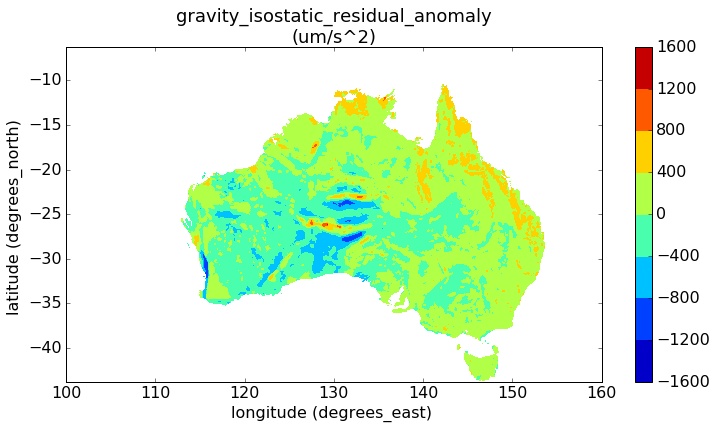

In [9]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(lon[:], lat[:], grav[:,:])
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(grav.long_name+'\n'+'('+grav.units+')', fontsize=18)
plt.xlabel(lon.long_name+' ('+ lon.units +') ', fontsize=16)
plt.ylabel(lat.long_name+' ('+ lat.units +') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


## Geospatial search and subset
Extract a geospatial subset and view result.

In [10]:
lonCriteria = (lon[:] < 150) & (lon[:] > 140)
latCriteria = (lat[:] < -39) & (lat[:] > -45)

In [11]:
lon_subset = lon[lonCriteria]
lat_subset = lat[latCriteria]
grav_subset = grav[latCriteria, lonCriteria]

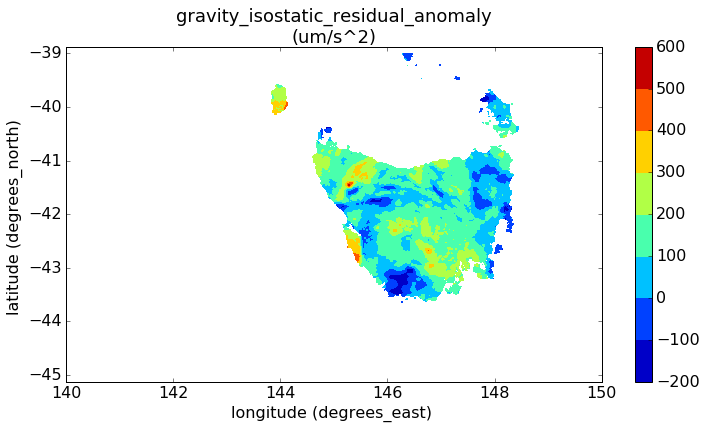

In [12]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(lon_subset, lat_subset, grav_subset)
plt.axis('equal')
cbar = plt.colorbar()

# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(grav.long_name+'\n'+'('+grav.units+')', fontsize=18)
plt.xlabel(lon.long_name+' ('+ lon.units +') ', fontsize=16)
plt.ylabel(lat.long_name+' ('+ lat.units +') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


## Plot data long transect lines

### Extract data along lat, lon lines

In [13]:
line1 = -41.45
ii = abs(lat_subset[:] - line1) < .001

line2 = 146.8
jj = abs(lon_subset[:] - line2) < .004

In [14]:
grav_line1 = grav_subset[ii,:]
grav_line2 = grav_subset[:,jj]

### Plot transects

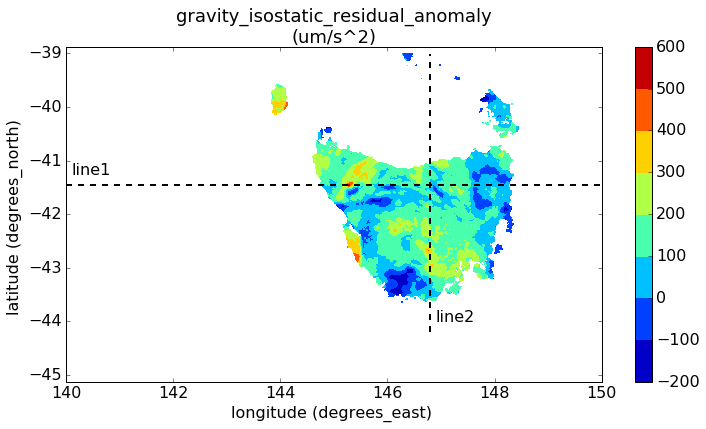

In [15]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot data subset with equal axes and colorbar
plt.contourf(lon_subset, lat_subset, grav_subset)
plt.axis('equal')
cbar = plt.colorbar()

# Add transect line
plt.plot([lon_subset.min(), lon_subset.max()], 
         [lat_subset[ii], lat_subset[ii]], 
         '--k', lw=2)
plt.text(lon_subset.min()+.1, lat_subset[ii]+.2, 'line1', fontsize=16)

plt.plot([lon_subset[jj], lon_subset[jj]], 
         [lat_subset.min(), lat_subset.max()], 
         '--k', lw=2)
plt.text(lon_subset[jj]+.1, lat_subset.min()+.2, 'line2', fontsize=16)


# Add figure title and labels
# We can make use of the defined variable attributes to do this
plt.title(grav.long_name+'\n'+'('+grav.units+')', fontsize=18)
plt.xlabel(lon.long_name+' ('+ lon.units +') ', fontsize=16)
plt.ylabel(lat.long_name+' ('+ lat.units +') ', fontsize=16)

# Adjust tick mark size
cbar.ax.tick_params(labelsize=16) 
plt.tick_params(labelsize=16)


### Plot data along transect lines

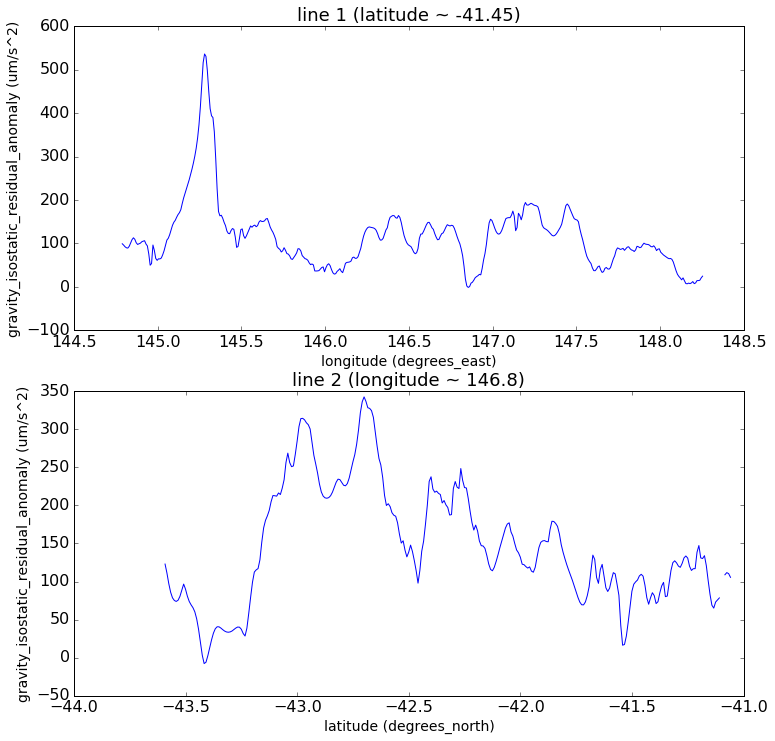

In [16]:
# Set figure size
plt.figure(figsize=(12,12))

# line 1
plt.subplot(211)
plt.plot(lon_subset, grav_line1[0,:])
plt.title('line 1 (latitude ~ '+str(line1)+')', fontsize=18)
plt.xlabel('longitude ('+lon.units+')', fontsize=14)
plt.ylabel(grav.long_name+' ('+grav.units+')', fontsize=14)
plt.tick_params(labelsize=16)


# line 2
plt.subplot(212)
plt.title('line 2 (longitude ~ '+str(line2)+')', fontsize=18)
plt.plot(lat_subset, grav_line2[:,0])
plt.xlabel('latitude ('+lat.units+')', fontsize=14)
plt.ylabel(grav.long_name+' ('+grav.units+')', fontsize=14)
plt.tick_params(labelsize=16)


In [17]:
f.close()